In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from nonlocalunet.models import NonLocalUnet
from liverfiles.metrics import dr_score, mhd_score
from liverfiles.Trainer import Trainer
from liverfiles.utils import get_nii, get_mask
    
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

from liverfiles.loader import Ds

import random
import wandb
from torch.utils.tensorboard import SummaryWriter
from liverfiles.utils import img_with_masks

In [2]:
writer = SummaryWriter()

In [2]:
pathes = []
for (dirpath, dirnames, filenames) in os.walk('data'):
    if dirpath == os.path.join('data', 'segmentations'):
        continue
    pathes.extend([os.path.join(dirpath, i)for i in filenames] )
df = pd.DataFrame({'path': pathes})
df['id'] = df.path.str.split(os.path.sep).str[-1].str[7:-4]
df.id = df.id.astype('int16')
df = df.sort_values(by='id').reset_index(drop=True)

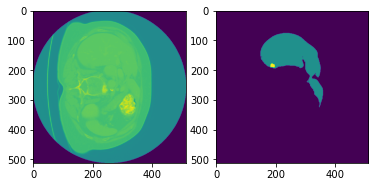

In [3]:
c = 56
img_idx = 0
plt.subplot(1,2,1)
plt.imshow(get_nii(df.path[img_idx])[:,:,c])
plt.subplot(1,2,2)
plt.imshow(get_mask(df.id[img_idx])[:,:,c])

In [4]:
img = get_nii(df.path[img_idx])
mask = get_mask(df.id[img_idx])

In [5]:
def ct_to_video(ct):
    ct -= ct.min()
    ct_max = ct.max()
    if ct_max != 0:
        ct = ct/ct_max
    ct *= 255
    ct = ct.astype("uint8")
    ct = ct.transpose(2,1,0)
    ct = np.expand_dims(ct, axis=1)
    ct = np.expand_dims(ct, axis=0)
    return ct

In [6]:
mask = ct_to_video(mask)
img = ct_to_video(img)

In [8]:
img.shape

(1, 75, 1, 512, 512)

In [15]:
kek[0].shape

(1, 75, 3, 512, 512)

In [7]:
kek = img_with_masks(img, [mask], 0.1)

[0.         0.49803922 1.        ]


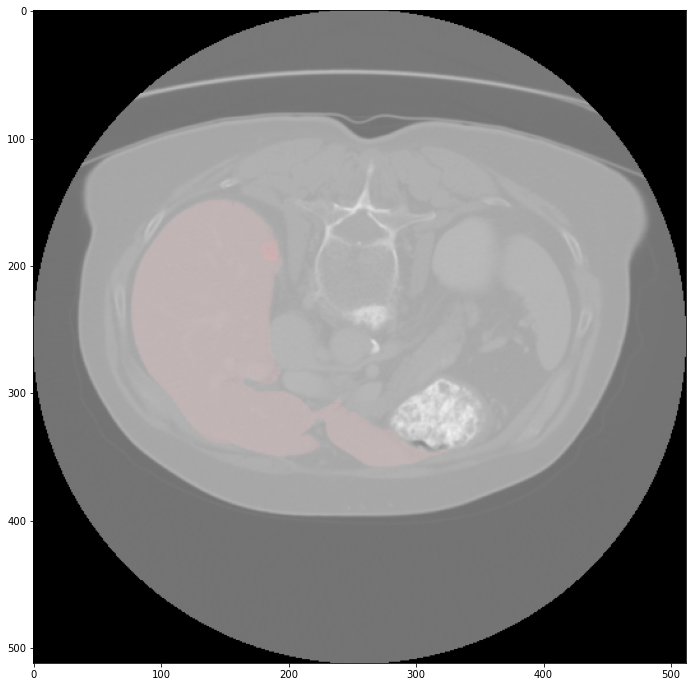

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(kek[0][0,56,:,:,:].transpose(1,2,0))

In [13]:
wandb.log({"video1": wandb.Video(img, fps=4, format="gif"),
          "mask1": wandb.Video(mask, fps=4, format="gif")}, step=1)

t:  11%|███████▍                                                              | 8/75 [00:00<00:00, 70.96it/s, now=None]

MoviePy - Building file C:\Users\ABYLAI~1\AppData\Local\Temp\tmp43pqxpjzwandb-media\1a1cxgjp.gif with imageio.


t:  19%|████████████▋                                                       | 14/75 [00:00<00:00, 132.38it/s, now=None]

MoviePy - Building file C:\Users\ABYLAI~1\AppData\Local\Temp\tmp43pqxpjzwandb-media\o450tein.gif with imageio.
